In [1]:
# imports 
from pprint import pprint
from matplotlib import pyplot as plt
import yaml
import os
from xmlpathology.argconfigparser import argconfigparser

from xmlpathology.xmlbatchgenerator.core.generators import XmlBatchGeneratorVanilla
from xmlpathology.io.dataset import DataSet, DataSetLoader
from xmlpathology.io.annotationparser import AnnotationParserLoader, AsapAnnotationParser
from xmlpathology.io.imagereader import ImageReader
from xmlpathology.xmlbatchgenerator.callbacks.samplecallbacks.fityolo import FitYolo
import time
import numpy as np
import glob
# config = argconfigparser.parse('/home/mart/radboudumc/lib/hooknet/hooknet/config/parameters.yml', notebook=True)

In [ ]:
tif_list = glob.glob('/home/user/data_lvl1/*.tif')
xml_list = glob.glob('/home/user/level1/*.xml')

In [ ]:
tif_list = sorted(tif_list)
xml_list = sorted(xml_list)

In [ ]:
len(tif_list), len(xml_list)

In [ ]:
tif_set = set(tif_list)
xml_set = set(xml_list)

In [ ]:
data_dict = {'training': [], 'validation': []}
for xml in xml_list:
    name = xml.split('/')[-1].split('.')[0]
    for tif in tif_list:
        if name in tif:
            item = {'image_path': tif, 'annotation_path': xml}
            mode = 'training' if np.random.random() > 0.3 else 'validation'
            data_dict[mode].append(item)

In [ ]:
# data_dict

In [ ]:
with open('/home/user/data.yml', 'w') as outfile:
    yaml.dump(data_dict, outfile, default_flow_style=False)

NameError: name 'label_map' is not defined

In [2]:
""" 
Data setup
"""

# get the data from datasource.yml:

# ---
# training:
#   -
#     annotation_path: /home/mart/radboudumc/data/xmls/level1/T10-00485-I-19-1-gr3.xml
#     image_path: /home/mart/radboudumc/data/images/level1/T10-00485-I-19-1-gr3.tif
# 

data_sources_path = '/home/mart/Radboudumc/data/lymphocytes/lymphocytes.yml'
with open(data_sources_path) as f:
    data_sources = yaml.load(f, yaml.FullLoader)
    
print('data sources:')
pprint(data_sources)

data sources:
{'training': [{'annotation_path': '/home/mart/Radboudumc/data/lymphocytes/1079_CD3.xml',
               'image_path': '/home/mart/Radboudumc/data/lymphocytes/1079_CD3.tif'}]}


In [8]:
imgreader = ImageReader(data_sources['training'][0]['image_path'], 0.2)

[(210579, 94968),
 (105289, 47484),
 (52644, 23742),
 (26322, 11871),
 (13161, 5935),
 (6580, 2967),
 (3290, 1483),
 (1645, 741),
 (822, 370)]

In [3]:
"""
Label map
"""

# # set the label_map, which maps labels that are in the annotation file to label_values:
# label_map = \
# {
#     'dcis': 1,
#     'idc': 2,
#     'ilc': 3,
#     'fatty tissue': 4,
#     'stroma': 5,
#     'erythrocytes': 6,
#     'non malignant epithelium': 7,
#     'inflammatory cells': 8,
#     'skin/nipple': 9
# }

label_map = \
{
    'polygon': 0,
    'dot': 1,
}

inverse_label_map = {value:key for key, value in label_map.items()}

print('label map:')
pprint(label_map)

label map:
{'dot': 1, 'polygon': 0}


In [4]:
fit_yolo_callback = FitYolo(label_map, (128,128,3), (16,16), 1, 24)

In [5]:
"""
Starting the XmlBatchGeneratorVanilla
"""

batchgenerator = XmlBatchGeneratorVanilla(data_sources=data_sources,
                                          label_map=label_map,
                                          open_images_ahead=False,
                                          batch_size=16,
                                          input_shape=(128,128,3),
                                          cpus=4,
                                          spacing=2.0,
                                          strict_point_sampling=True,
                                          sample_callbacks=[fit_yolo_callback],
                                          log_path='/home/mart/logfiles/')

batchgenerator.start()

'_set_overlapping_annotations'  31.62 ms
'_open_image_annotations'  45.57 ms
'_init_samples'  0.21 ms


TypeError: unsupported operand type(s) for -: 'NoneType' and 'float'

In [6]:
batchgenerator.stop()

batch generator stopped


In [7]:
"""
Starting the XmlBatchGeneratorVanilla
"""

batchgenerator = XmlBatchGeneratorVanilla(data_sources=data_sources,
                                          label_map=label_map,
                                          log_path='/home/mart/logfiles/')
batchgenerator.start()

'_set_overlapping_annotations'  57.39 ms
'_open_image_annotations'  91.42 ms
'_init_samples'  0.13 ms
None
batch generator started (single core)


In [12]:
b = batchgenerator.batch('training')

(16, 1, 1, 128, 128, 3)
(16, 1, 1, 16, 16, 1, 6)


In [13]:
patches, masks = b

In [8]:
masks.shape

(16, 16, 16, 6)

In [8]:
patches.shape

(16, 128, 128, 3)

In [ ]:
plt.imshow(patches[0])
plt.show()

In [ ]:
plt.imshow(masks[0])
plt.show()

In [ ]:
batchgenerator.stop()

In [ ]:
batchgenerator._batch_manager._batch_sampler['training']._sampler._patch_sampler._dataset._images

In [ ]:
"""
Retreiving a batch
"""

batch = batchgenerator.batch('training')

patches, masks = batch

print('Shape patches in batch:', patches.shape)
print('Shape masks in batch:', masks.shape)

In [ ]:
batch_size = 64
input_shape =(256,256,3)
spacing = 0.5
task = 'segmentation'

batchgenerator = XmlBatchGeneratorVanilla(data_sources=data_sources,
                                          label_map=label_map,
                                          batch_size=batch_size,
                                          input_shape=input_shape,
                                          spacing=spacing,
                                          input_shape=(128,128,3)
                                          task=task,
                                          cpus=8)
batchgenerator.start()

# batch = batchgenerator.batch('training')
# patches, masks  = batch

# print('Shape patches in batch:', patches.shape)
# print('Shape masks in batch:', masks.shape)

In [ ]:
batch_size = 16
input_shape =(224,224,3)
spacing = 0.5


batchgenerator = XmlBatchGeneratorVanilla(data_sources=data_sources,
                                          label_map=label_map,
                                          batch_size=batch_size,
                                          input_shape=input_shape,
                                          seed=1,
                                          spacing=spacing,
                                          cpus=6)
batchgenerator.start()

# batch = batchgenerator.batch('training')
# patches, _  = batch
# print('Shape patches in batch:', patches.shape)

In [ ]:
batchgenerator.stop()

In [ ]:
from xmlpathology.io.imagereader import ImageReader

class WsiPatches:
    
    def __init__(self, wsi_path, spacing, input_shape):
        self._image = ImageReader(wsi_path, 0.2)
        self._wsi_dims = image.shapes[image.level(spacing)]
        self._x, self._y = 0, 0
        self._input_shape = input_shape
        
    def __iter__(self):
        return self

    def __next__(self):
        if self.n > self.max:
            raise StopIteration

        
        self.n += 1
        return result

In [30]:
from diagmodels.models.keras.yolo import Yolo

In [31]:
yolo_model = Yolo()

In [32]:
yolo_model.configure(input_shape=(128,128,3),
                     grid_shape=(16,16),
                     anchor_shape=(3,3),
                     batch_size=16,
                     depth=3,
                     classes=1,
                     learning_rate=0.005,
                     branching_factor=5,
                     batch_norm=True,
                     dropout_count=0,
                     dropout_prob=0.0,
                     l2_lambda=0.02,
                     channels_first=False)

In [33]:
yolo_model.build()

(None, 16, 16, 128)
(None, 16, 16, 1, 6)


In [ ]:
for _ in range(1000):
    loss = yolo_model._model_instance.train_on_batch(patches, masks)


In [15]:
len(list(masks))

16

In [25]:
patches.shape

(16, 128, 128, 3)

In [59]:
loss

2.8374102

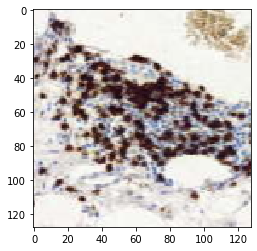

In [14]:
plt.imshow(patches[7])
plt.show()

In [71]:
masks[0].shape

(16, 16, 1, 6)